# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [29]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [30]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [31]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

In [32]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = "colab"

## Importing the Dataset & Exploring it

In [33]:
df = pd.read_csv("TSLA (2).csv")

In [34]:
#read_csv function from pandas

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-27,194.419998,197.389999,189.940002,191.809998,191.809998,120851600
1,2023-03-28,192.000000,192.350006,185.429993,189.190002,189.190002,98654600
2,2023-03-29,193.130005,195.289993,189.440002,193.880005,193.880005,123660000
3,2023-03-30,195.580002,197.330002,194.419998,195.279999,195.279999,110252200
4,2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,170222100


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,222.924201,227.074320,218.618320,222.970800,222.970800,1.201438e+08
std,35.144975,35.643085,34.631614,35.128422,35.128422,2.547997e+07
min,152.639999,160.479996,152.369995,153.750000,153.750000,6.512520e+07
25%,190.264996,194.007499,185.699997,189.282501,189.282501,1.030262e+08
50%,230.940002,236.300003,227.359993,233.075004,233.075004,1.169300e+08
75%,251.787495,257.992500,247.394993,253.019993,253.019993,1.331554e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [38]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [39]:
px.area(df, x="Date", y="Close")

In [40]:
px.area(df, x = "Date", y = "Volume")

In [41]:
px.bar(df, y = "Volume")

In [42]:
px.box(df, y = "Close")

# Understanding Facebook Prophet

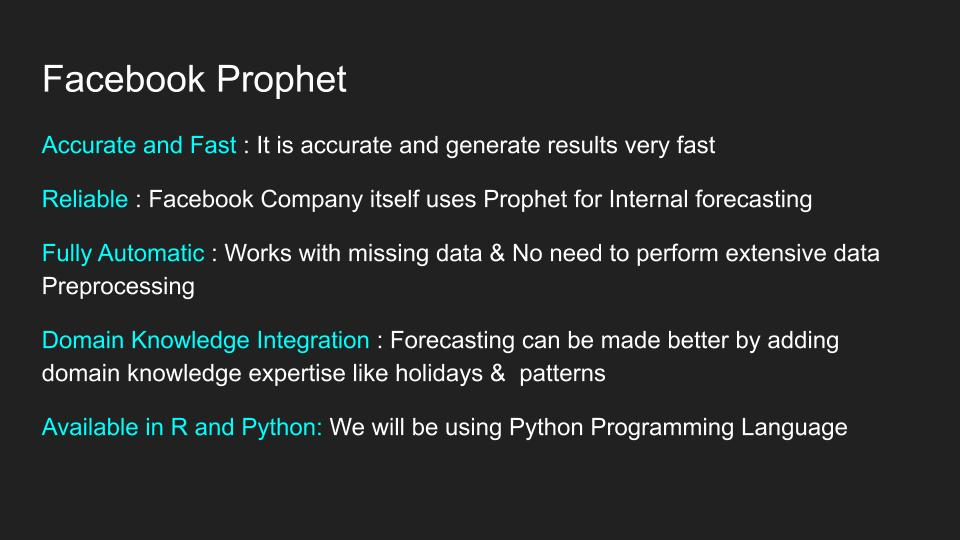

## Data Preperation

In [43]:
columns = ['Date', "Close"]
ndf = pd.DataFrame(df, columns = columns)
ndf

,Date,Close
0,2023-03-27,191.809998
1,2023-03-28,189.190002
2,2023-03-29,193.880005
3,2023-03-30,195.279999
4,2023-03-31,207.460007
...,...,...
245,2024-03-18,173.800003
246,2024-03-19,171.320007
247,2024-03-20,175.660004
248,2024-03-21,172.820007


In [44]:
  prophet_df = ndf.rename(columns = {'Date' : 'ds', 'Close':'y'})
  prophet_df

,ds,y
0,2023-03-27,191.809998
1,2023-03-28,189.190002
2,2023-03-29,193.880005
3,2023-03-30,195.279999
4,2023-03-31,207.460007
...,...,...
245,2024-03-18,173.800003
246,2024-03-19,171.320007
247,2024-03-20,175.660004
248,2024-03-21,172.820007


## Creating Facebook Prophet Model

In [45]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm4hm28v/3selccv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm4hm28v/22kpku6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29156', 'data', 'file=/tmp/tmpjm4hm28v/3selccv0.json', 'init=/tmp/tmpjm4hm28v/22kpku6d.json', 'output', 'file=/tmp/tmpjm4hm28v/prophet_modelwu4u_f9o/prophet_model-20240426092931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [46]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-27,169.031599,140.800899,185.924064,169.031599,169.031599,-4.841106,-4.841106,-4.841106,-4.841106,-4.841106,-4.841106,0.0,0.0,0.0,164.190494
1,2023-03-28,169.714793,144.850911,191.130207,169.714793,169.714793,-3.022700,-3.022700,-3.022700,-3.022700,-3.022700,-3.022700,0.0,0.0,0.0,166.692093
2,2023-03-29,170.397987,143.823551,191.486147,170.397987,170.397987,-3.783122,-3.783122,-3.783122,-3.783122,-3.783122,-3.783122,0.0,0.0,0.0,166.614865
3,2023-03-30,171.081180,142.207920,190.526666,171.081180,171.081180,-5.200868,-5.200868,-5.200868,-5.200868,-5.200868,-5.200868,0.0,0.0,0.0,165.880312
4,2023-03-31,171.764374,143.183877,189.938142,171.764374,171.764374,-5.357490,-5.357490,-5.357490,-5.357490,-5.357490,-5.357490,0.0,0.0,0.0,166.406884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-04-17,162.713125,134.440234,182.729755,160.633890,165.001523,-3.783122,-3.783122,-3.783122,-3.783122,-3.783122,-3.783122,0.0,0.0,0.0,158.930003
276,2024-04-18,162.094635,133.288051,179.593821,159.866110,164.543415,-5.200868,-5.200868,-5.200868,-5.200868,-5.200868,-5.200868,0.0,0.0,0.0,156.893766
277,2024-04-19,161.476145,131.273359,178.957732,159.094515,164.061844,-5.357490,-5.357490,-5.357490,-5.357490,-5.357490,-5.357490,0.0,0.0,0.0,156.118655
278,2024-04-20,160.857655,150.321567,195.469494,158.301102,163.627130,11.102643,11.102643,11.102643,11.102643,11.102643,11.102643,0.0,0.0,0.0,171.960298


In [48]:
px.line(forecast, x = 'ds', y = 'yhat')

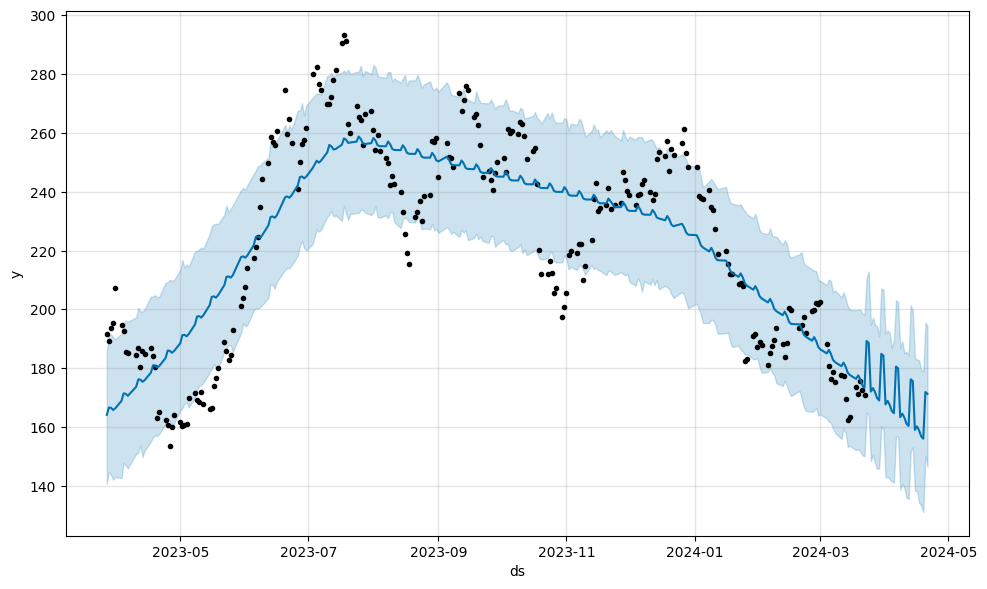

In [49]:
figure = m.plot(forecast, xlabel = 'ds', ylabel = "y")

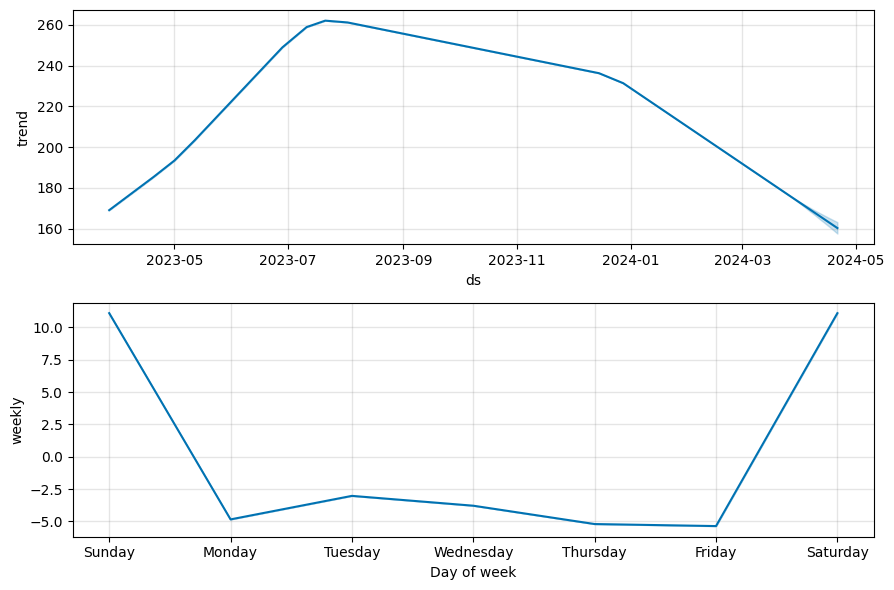

In [50]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [52]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>